# Week 04 Assignment weather data

Welcome to week four of this course programming 1. Analyzing time related data such as estimating seasonal effect, or year effect might be a challenge. How to filter the essential information from the noise? How to apply signal analysis with noisy data. How to make compact useful visualizations? Python has several constructs to handle date time related data. The relevant classes for making plots are Locators and Formatters. Locators determine where the ticks are, and formatters control the formatting of tick labels. The relevant class for date time data is the pandas datetime data type, which has methods like resample and several possibilities to display data (frequencies). As a study case we will work with weather data. If you have data that fits the learning goals, you can bring your own data.

Keywords: signal processing, smoothing, resample, formatters and locators, datetime object

More to read: 

- https://fennaf.gitbook.io/bfvm19prog1/
- https://machinelearningmastery.com/time-series-data-visualization-with-python/
- https://towardsdatascience.com/how-to-plot-time-series-86b5358197d6
- In the https://pandas.pydata.org/docs/reference/offset_frequency.html you can find more about frequencies and in the documentation
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html you can read all the methods of this datetime object.

Learning objectives

- load, inspect and clean a dataset
- reshape dataframes to group data in a certain frequency
- apply smoothing technologies
- Create useful visualisation with timeseries data
- Maintain development environment 
- Apply coding standards and FAIR principles


## Assignment

You will to organise your data into the required format and apply smoothing. In this assignment we will work with weatherdata from the KNMI. A subset of weatherdata is for you available in the file: `KNMI_20181231`. The data consist of several stations with daily weather data of several years. Your task is to make a plot similar to the plot below. 

<img src="../images/weather.png" alt="drawing" width="400"/>


Furthermore the plot needs the following enhancements

1. proper titles and ticks
2. widgets selecting a particular year or all years
3. lines need to be smoothed
3. legends needs to be added

Use your creativity. Consider colors, alpha settings, sizes etc. 

Learning outcomes

- load, inspect and clean a dataset 
- reformat dataframes
- apply smoothing technologies
- visualize timeseries data

The assignment consists of 6 parts:

- [part 1: load the data](#0)
- [part 2: clean the data](#1)
- [part 3: reformat data](#2)
- [part 4: smooth the data](#3)
- [part 5: visualize the data](#4)
- [part 6: Challenge](#5)

Part 1 and 5 are mandatory, part 6 is optional (bonus)
To pass the assingnment you need to a score of 60%. 


NB if you want to make a plot with more actual data you can download data from https://openweathermap.org/api 


---

<a name='0'></a>
## Part 1: Load the data

Either load the dataset `KNMI_20181231.csv` or `KNMI_20181231.txt.tsv`. The dataheaders contain spaces and are not very self explainable. Change this into more readable ones. Select data from a station. Station 270 is in the neighborhood of Groningen. For our plot we only need the the mean, minimum and maximum temperature. Of course you are welcome to select other data if you think it might be useful for your visualization. The data should look something like this:


In [491]:
# SOURCE: KONINKLIJK NEDERLANDS METEOROLOGISCH INSTITUUT (KNMI)
#
#
# STN      LON(east)   LAT(north)     ALT(m)  NAME
# 209:         4.518       52.465       0.00  IJMOND
# 210:         4.430       52.171      -0.20  VALKENBURG
# 215:         4.437       52.141      -1.10  VOORSCHOTEN
# 225:         4.555       52.463       4.40  IJMUIDEN
# 235:         4.781       52.928       1.20  DE KOOY
# 240:         4.790       52.318      -3.30  SCHIPHOL
# 242:         4.921       53.241      10.80  VLIELAND
# 248:         5.174       52.634       0.80  WIJDENES
# 249:         4.979       52.644      -2.40  BERKHOUT
# 251:         5.346       53.392       0.70  HOORN (TERSCHELLING)
# 257:         4.603       52.506       8.50  WIJK AAN ZEE
# 258:         5.401       52.649       7.30  HOUTRIBDIJK
# 260:         5.180       52.100       1.90  DE BILT
# 265:         5.274       52.130      13.90  SOESTERBERG
# 267:         5.384       52.898      -1.30  STAVOREN
# 269:         5.520       52.458      -3.70  LELYSTAD
# 270:         5.752       53.224       1.20  LEEUWARDEN
# 273:         5.888       52.703      -3.30  MARKNESSE
# 275:         5.873       52.056      48.20  DEELEN
# 277:         6.200       53.413       2.90  LAUWERSOOG
# 278:         6.259       52.435       3.60  HEINO
# 279:         6.574       52.750      15.80  HOOGEVEEN
# 280:         6.585       53.125       5.20  EELDE
# 283:         6.657       52.069      29.10  HUPSEL
# 285:         6.399       53.575       0.00  HUIBERTGAT
# 286:         7.150       53.196      -0.20  NIEUW BEERTA
# 290:         6.891       52.274      34.80  TWENTHE
# 308:         3.379       51.381       0.00  CADZAND
# 310:         3.596       51.442       8.00  VLISSINGEN
# 311:         3.672       51.379       0.00  HOOFDPLAAT
# 312:         3.622       51.768       0.00  OOSTERSCHELDE
# 313:         3.242       51.505       0.00  VLAKTE V.D. RAAN
# 315:         3.998       51.447       0.00  HANSWEERT
# 316:         3.694       51.657       0.00  SCHAAR
# 319:         3.861       51.226       1.70  WESTDORPE
# 323:         3.884       51.527       1.40  WILHELMINADORP
# 324:         4.006       51.596       0.00  STAVENISSE
# 330:         4.122       51.992      11.90  HOEK VAN HOLLAND
# 331:         4.193       51.480       0.00  THOLEN
# 340:         4.342       51.449      19.20  WOENSDRECHT
# 343:         4.313       51.893       3.50  R'DAM-GEULHAVEN
# 344:         4.447       51.962      -4.30  ROTTERDAM
# 348:         4.926       51.970      -0.70  CABAUW
# 350:         4.936       51.566      14.90  GILZE-RIJEN
# 356:         5.146       51.859       0.70  HERWIJNEN
# 370:         5.377       51.451      22.60  EINDHOVEN
# 375:         5.707       51.659      22.00  VOLKEL
# 377:         5.763       51.198      30.00  ELL
# 380:         5.762       50.906     114.30  MAASTRICHT
# 391:         6.197       51.498      19.50  ARCEN

import pandas as pd
df = pd.read_csv("data/KNMI_20181231.txt.tsv", comment='#')





C:\Users\hendr\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


---

<a name='1'></a>
## Part 2: Clean the data

The data ia not clean. There are empty cells in the dataframe which needs to be replaced with NaN's and the temperature is in centidegrees which needs to be transformed into degrees. The date field needs a datetime format. For visualization convience we would like to remove the leap year. Conduct the cleaning.

In [492]:
#replace cells with spaces to NaN
import numpy as np
from pandas import to_datetime
df = df.replace(r'^\s+$', np.nan, regex=True)
## change data formats

# first strip all column names
df = df.rename(columns=lambda x: x.strip())
df['YYYYMMDD'] = to_datetime(df['YYYYMMDD'], format='%Y%m%d')
df = df.astype({'STN' : 'int64','TG' : 'float64','TN' : 'float64','TX' : 'float64','SQ' : 'float64','DR' : 'float64','RH' : 'float64'})

## change temperatures to celcius degrees
# : divide every number by 10
df.iloc[:, [2,3,4,5,6,7]] = df.iloc[:, [2,3,4,5,6,7]] * 0.1

## remove leap days
# change column name to Date
pd.DataFrame.rename(df, columns={df.columns[1] : "Date"}, inplace=True)

# delete leap day
df = df[~((df.Date.dt.month == 2) & (df.Date.dt.day == 29))]

# select a station
station = 270
df = df[df['STN'] == station]
print(df)

# set date as index
df = df.set_index(df['Date'])
df = df.sort_index()
df = df.drop(columns = 'Date')
df


        STN       Date   TG   TN    TX   SQ    DR    RH
97641   270 2000-01-01  4.2 -0.4   7.9  4.9   1.5   1.1
97642   270 2000-01-02  5.5  3.3   7.4  1.2   0.0  -0.1
97643   270 2000-01-03  7.4  4.9   8.9  0.0  12.4  17.2
97644   270 2000-01-04  4.6  2.2   7.5  0.4   1.3   1.1
97645   270 2000-01-05  4.1  1.4   5.6  5.6   0.0   0.0
...     ...        ...  ...  ...   ...  ...   ...   ...
104576  270 2018-12-27  5.7  5.3   6.2  0.0   0.9   0.2
104577  270 2018-12-28  7.1  5.8   8.1  0.0   0.0   0.0
104578  270 2018-12-29  8.5  6.9  10.2  0.0   1.4   1.8
104579  270 2018-12-30  8.0  6.8   9.0  0.0   1.4   0.5
104580  270 2018-12-31  8.7  8.2   9.7  3.8   0.0  -0.1

[6935 rows x 8 columns]


,STN,TG,TN,TX,SQ,DR,RH
Date,,,,,,,
2000-01-01,270,4.2,-0.4,7.9,4.9,1.5,1.1
2000-01-02,270,5.5,3.3,7.4,1.2,0.0,-0.1
2000-01-03,270,7.4,4.9,8.9,0.0,12.4,17.2
2000-01-04,270,4.6,2.2,7.5,0.4,1.3,1.1
2000-01-05,270,4.1,1.4,5.6,5.6,0.0,0.0
...,...,...,...,...,...,...,...
2018-12-27,270,5.7,5.3,6.2,0.0,0.9,0.2
2018-12-28,270,7.1,5.8,8.1,0.0,0.0,0.0
2018-12-29,270,8.5,6.9,10.2,0.0,1.4,1.8


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>pd.to_datetime(df['Date'].astype(str), format='%Y%m%d')</li>
    <li>regex for empty cells = `^\s*$` </li>
    <li>remove month == 2 & day == 29</li> 
</ul>
</details>

In [493]:
#Test your outcome
#write code to check if you have done the above

### Expected outcome

---

<a name='2'></a>
## Part 3: Reform your data

First we will split the data in data from 2018 and data before 2018. Best is to split this in two dataframes. 
Next we need for the non 2018 data the minimum values for each day and the maximum values for each day. So we look for the minimum value out of all january-01 minimum values (regardless the year). Create a dataframe with 365 days containing the ultimate minimum and the ultimate maximum per day. 


In [494]:
## for df_before find the minimum and maximum value for each day
## create a dataframe with 365 days containing the ultimate minimum and the ultimate maximum per day



def month_day(df):
    # # Drop columns except TG
    # df = df.drop(df.columns[2:], axis = 1)

    ## Split into two dataframes, before 2018 and from 2018
    df_before = df[:'2017-12-31']
    df_after = df['2018-01-01':]

    # Changed the date to just day-month
    df_before.index = df_before.index.strftime('%m-%d')
    df_after.index = df_after.index.strftime('%m-%d')

    # Sort the index
    # df_before = df_before.sort_index()
    # df_after = df_after.sort_index()

    # groupby Date
    df_before_max = df_before.groupby(df_before.index).max()
    df_before_min = df_before.groupby(df_before.index).min()

    df_after_max = df_after.groupby(df_after.index).max()
    df_after_min = df_after.groupby(df_after.index).min()

    df_after_mean = df_after.groupby(df_after.index).mean()

    # print(df_after_max)
    # print(df_before_min)
    
    return df_before_max, df_before_min, df_after_max, df_after_min, df_after_mean



In [495]:
#Test your code
def test_reformed(df):
    #
    # df = df[(df.index.year > 2007) & (df.index.year < 2018)]
    month_day(df)

test_reformed(df)

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use the dt.month and dt.day to groupby</li>
</ul>
</details>

### Expected outcome
Note, the layout or names my differ, but the length should be 365 and the minimum values should be the same

---

<a name='3'></a>
## Part 4: Smooth the data

Make a function that takes an array or a dataframe column and returns an array of smoothed data. Explain in words why you choose a certain smoothing algoritm. Ask the signal analysis teacher if you want some advice.


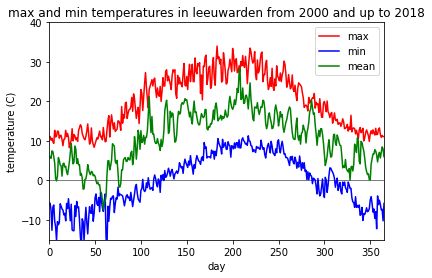

In [496]:
#your code here

# TG       = Temperature average  (in 0.1 degrees Celsius);
# TN       = Minimum Temperature (in 0.1 degrees Celsius);
# TX       = Maximum Temperature (in 0.1 degrees Celsius);

## Fit polynomial (interp1d) through datapoints, return an array of this data

from scipy.interpolate import interp1d
import scipy.interpolate as interp

df_before_max = month_day(df)[0]    #before 2018
df_before_min = month_day(df)[1]

df_after_max = month_day(df)[2]     #after 2018
df_after_min = month_day(df)[3]
df_after_mean = month_day(df)[4]

## columns of the dataframe as x and y
date = np.arange(1,366,1)

temperature_before_max = df_before_max['TX']
temperature_before_min = df_before_min['TN']
temperature_after_max = df_after_max['TX']
temperature_after_min = df_after_min['TN']
temperature_after_mean = df_after_mean['TG']

spline_before_max = interp.CubicSpline(date, temperature_before_max, extrapolate='periodic')
spline_before_min = interp.CubicSpline(date, temperature_before_min, extrapolate='periodic')
spline_after_max = interp.CubicSpline(date, temperature_after_max, extrapolate='periodic')
spline_after_min = interp.CubicSpline(date, temperature_after_min, extrapolate='periodic')
spline_after_mean = interp.CubicSpline(date, temperature_after_mean, extrapolate='periodic')

x = date
y_before_max = spline_before_max(x)
y_before_min = spline_before_min(x)
y_after_max = spline_after_max(x)
y_after_min = spline_after_min(x)
y_after_mean = spline_after_mean(x)

#your motivation here
#Smoothing CubicSpline because thats what you do


### matplotlib plot
import matplotlib.pyplot as plt

plt.axhline(0., color='k', lw=.5)
# plt.plot(time, volume, 'o:k', label='original')
# plt.plot(x, np.mean(volume), '-g', label='spline')
plt.plot(x, y_before_max, '-r', label='max')
plt.plot(x, y_before_min, '-b', label='min')
plt.plot(x, y_after_mean, '-g', label='mean')
# plt.plot(x, y_cubic, '-b', label='cubicspline_periodic')
plt.xlabel('day'); plt.ylabel('temperature (C)')
plt.title('max and min temperatures in leeuwarden from 2000 and up to 2018')
plt.legend(); plt.xlim(0, 365);plt.ylim(-15, 40); plt.show()

---

<a name='4'></a>
## Part 5: Visualize the data

Plot the mean temperature of the year 2018. Create a shaded band with the ultimate minimum values and the ultimate maximum values from the multi-year dataset. Add labels, titles and legends. Use proper ranges. Be creative to make the plot attractive. 



In [500]:
x = date
y_before_max = spline_before_max(x)
y_before_min = spline_before_min(x)
y_after_max = spline_after_max(x)
y_after_min = spline_after_min(x)
y_after_mean = spline_after_mean(x)

from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.io import output_notebook
from bokeh.plotting import ColumnDataSource
from bokeh.models import CustomJS, Dropdown
output_notebook()
from bokeh.models import Band

from scipy.ndimage import gaussian_filter1d

y_after_mean_smooth = gaussian_filter1d(y_after_mean, 2)
y_before_min_smooth = gaussian_filter1d(y_before_min, 2)
y_before_max_smooth = gaussian_filter1d(y_before_max, 2)

source = ColumnDataSource({
        'base': x,
        'lower': y_before_min_smooth,
        'upper': y_before_max_smooth
        })
        
band = ''

# band = Band(base='base', lower='lower', upper='upper', source=source, level='underlay',
#             fill_alpha=0.5, line_width=1, line_color='black')

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,zoom_in,zoom_out"
p = figure(tools=TOOLS, y_range=(-20,40))

p.line(x, y_after_mean_smooth, line_width = 2, color = 'Blue', legend_label='Day Average Temperature 2018')
band = Band(base='base', lower='lower', upper='upper', source=source, level='underlay',
            fill_alpha=0.4, line_width=2, line_color='red', fill_color = "LightGreen")

# p.triangle(x='time', y='glucose', line_width = 4, source=source, color = 'blue', legend_label='Data')
# p.line(x='time', y='rolling mean', line_width = 2, source=source, color = 'green', legend_label='Rolling mean')

p.title.text = 'Band is maximum and minimum temperatures of the last years (2000-)'
p.legend.location = "top_left"
p.legend.click_policy="hide"

p.xaxis.axis_label = 'Days'
p.yaxis.axis_label = 'Temperature (C)'

p.add_layout(band)
show(p)





Loading BokehJS ...

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use from bokeh.models import Band</li>
    <li>use ColumnDataSource to parse data arrays</li>
    <li>look for xaxis tick formatters</li>
</ul>
</details>

---

<a name='5'></a>
## Part 6: Challenge

Make a widget in which you can select the year range for the multiyear set. Or maybe a widget were you choose a different station. Add this to your layout to make the plot interactive. Add another widget to select or deselect the smoother. Inspiration: https://demo.bokeh.org/weather

In [498]:
######################### I will do this later

## Make a slider to choose years with panel?

## Connect this slider to the years through dictionary

## Add dropdown to choose different station

## Connect dropdown to station choosing